# k-Neighbors classifier 

In [46]:
from sklearn.datasets import make_blobs # for generatiing fake dataset 
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier 
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt 

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets  

In [47]:
#let's create dataset from male_blobs sklearn
def make_forge():
    # a carefully hand-designed dataset lol
    X, y = make_blobs(centers=2, random_state=4, n_samples=30)
    y[np.array([7, 27])] = 0
    mask = np.ones(len(X), dtype=np.bool)
    mask[np.array([0, 1, 5, 26])] = 0
    X, y = X[mask], y[mask]
    return X, y
X, y = make_forge()

In [48]:
# create dataframe 
df = pd.DataFrame(data = X,  columns=["Feature1", "Feature2"])
df["Class"] = y
df

,Feature1,Feature2,Class
0,9.963466,4.596765,1
1,11.032954,-0.168167,0
2,11.541558,5.211161,1
3,8.692890,1.543220,0
4,8.106227,4.286960,0
5,8.309889,4.806240,1
6,11.930271,4.648663,1
7,9.672847,-0.202832,0
8,8.348103,5.134156,1
9,8.674947,4.475731,1


In [70]:
plt.rcParams["figure.figsize"] = (8,6)

plt.scatter(df[""], X[:, 1], c = y, cmap = mcolors.ListedColormap(["blue", "red"]), marker='+', s=100)

In [50]:
#Split dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(df[["Feature1", 'Feature2']], df["Class"], random_state=0, test_size=0.25)

In [51]:
X_train

,Feature1,Feature2
13,8.922295,-0.639932
18,8.733709,2.491624
19,9.322983,5.098406
16,7.998153,4.852505
1,11.032954,-0.168167
10,9.177484,5.092832
25,11.563957,1.338940
24,9.150723,5.498322
8,8.348103,5.134156
6,11.930271,4.648663


In [52]:
y_train

13    0
18    0
19    1
16    1
1     0
10    1
25    0
24    1
8     1
6     1
4     0
9     1
7     0
23    0
3     0
0     1
21    0
15    1
12    0
Name: Class, dtype: int32

In [53]:
X_test

,Feature1,Feature2
2,11.541558,5.211161
20,10.063938,0.990781
14,9.491235,4.332248
17,8.183781,1.295642
5,8.309889,4.806240
11,10.240289,2.455444
22,8.344688,1.638243


In [54]:
y_test

2     1
20    0
14    1
17    0
5     1
11    1
22    0
Name: Class, dtype: int32

### Run KNN algorithm

In [55]:
class KNN: 
    
    def __init__(self, k = 3, distance_metric = 2):
        """Initialize k value and distance metric used for model."""
        self.k = k
        self.distance = distance_metric
        self.data = None
        
    def fit(self, X_train, y_train): # save into class
        self.X_train = X_train
        self.y_train = y_train
        
    def train(self, X, y):
        """Zip labels and input data together for classification."""
        # raise value error if inputs are wrong length or different types
        if len(X) != len(y) or type(X) != type(y):
            raise ValueError("X and y are incompatible.")
        # convert ndarrays to lists
        if type(X) == np.ndarray:
            X, y = X.tolist(), y.tolist()
        # set data attribute containing instances and labels
        self.data = [X[i]+[y[i]] for i in range(len(X))]

    def predict(self, a):
        """Predict class based on k-nearest neighbors."""
        neighbors = []
        # create mapping from distance to instance
        distances = {self.distance(x[:-1], a): x for x in self.data}
        # collect classes of k instances with shortest distance
        for key in sorted(distances.keys())[:self.k]:
            neighbors.append(distances[key][-1])
        # return most common vote
        return max(set(neighbors), key = neighbors.count)

In [56]:
clf = KNN(k = 3)
clf.fit(X_train, y_train)

In [57]:
result = pd.DataFrame(data = y_test, columns = ["Class"])
result["predicted_class"] = clf.predict(X_test)
result

,Class,predicted_class
2,1,1
20,0,0
14,1,1
17,0,0
5,1,1
11,1,0
22,0,0


In [58]:
print("Test set predictions: {}".format(clf.predict(X_test)))


Test set predictions: [1, 0, 1, 0, 1, 0, 0]


In [59]:
print("Test set accuracy: {:.2f}".format(clf.score(clf.predict(X_test), y_test)))

Test set accuracy: 0.86


# Knn for Breast Cancer detection (selecting the number of the neighbors)

In [60]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
cancer = load_breast_cancer()

dataset = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
dataset["Class"] = cancer.target
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [61]:
dataset.shape

(569, 31)

In [62]:
print("feaure names:", dataset.columns[:-1])

feaure names: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [63]:
data_features = dataset.copy()
data_features.drop(["Class"], axis=1, inplace = True)
data_target = dataset["Class"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(data_features,
                                                    data_target,
                                                    stratify=data_target,
                                                    random_state=66)

In [65]:
X_train.shape

(426, 30)

In [66]:
X_test.shape

(143, 30)

In [67]:
y_train.shape

(426,)

In [68]:
y_test.shape

(143,)

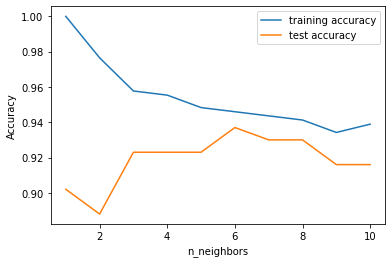

In [69]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()